In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Практическая работа №7  
Численное решения уравнения теплопроводности  
Вариант 9  

# Задание 1  
Численное решение  

In [ ]:
def y(t, x, u0, u1, a, L):
    u = 0

    for k in range(1, 100):
        mult = (-1)**(k + 1) / (2*k - 1)
        exp = np.exp(-((2*k - 1)**2 * np.pi**2 * a * t) / (4 * L**2))
        cos = np.cos((2*k - 1) * np.pi * x / (2 * L))
        u += mult * exp * cos

    return u1(t) + (4 / np.pi) * (u0(x) - u1(t)) * u


In [ ]:
def solve(mu, mu1, mu2, a, T, L, N, M):
    h = 2*L / N
    tau = T / M

    t = np.arange(0, T + tau, tau)
    x = np.arange(-L, L + h, h)
    u = np.zeros((len(t), len(x)))

    for i in range(len(x)):
        u[0, i] = mu(x[i])

    for n in range(len(t)-1):
        u[n+1, 0] = mu1(t[n+1])
        u[n+1, -1] = mu2(t[n+1])
        for i in range(1, len(x) - 1):
            u[n+1, i] = u[n, i] + tau * a * (u[n, i+1] - 2*u[n, i] + u[n, i-1]) / (h ** 2)

    return t, x, u

In [ ]:
def getM(a, L, T, N):
    return int(np.ceil(a * T * N**2 / (2 * L**2)))

In [ ]:
L = 2
a = 1

u0 = lambda x: 5
u1, u2 = lambda t: 80, lambda t: 80

T = 1
N = 100
M = getM(a, L, T, N)

tau = T / M
h = 2*L / N
alpha = a * tau / h**2
print(f"Необх. спектр. признак уст. {'не' * int(alpha > 0.5)} выполняется: a*tau/h^2={alpha}")

Необх. спектр. признак уст.  выполняется: a*tau/h^2=0.5


In [ ]:
t, x, u = solve(u0, u1, u2, a, T, L, N, M)

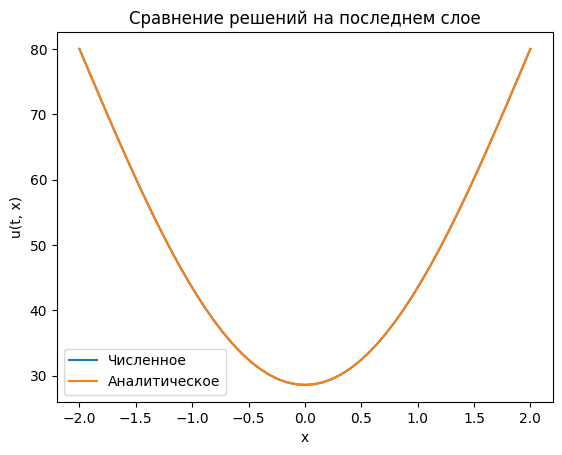

In [ ]:
plt.plot(x, u[-1, :], label="Численное")
plt.plot(x, y(t[-1], x, u0, u1, a, L), label="Аналитическое")

plt.title("Сравнение решений на последнем слое")
plt.xlabel("x")
plt.ylabel("u(t, x)")
plt.legend()

plt.show()

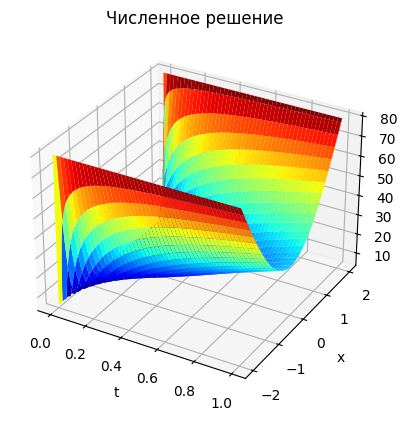

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')

X_grid, T_grid = np.meshgrid(x, t)

axes.set_title("Численное решение")
axes.plot_surface(T_grid, X_grid, u, cmap="jet")
axes.set_xlabel("t")
axes.set_ylabel("x")
axes.set_zlabel("u")

plt.show()

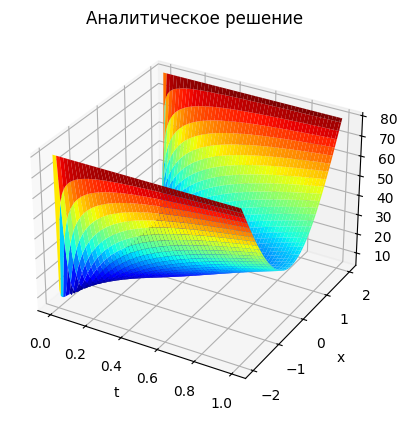

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')

x, t = np.linspace(-L, L, 100), np.linspace(0, T, 100)
X_grid, T_grid = np.meshgrid(x, t)

axes.set_title("Аналитическое решение")
axes.plot_surface(T_grid, X_grid, y(T_grid, X_grid, u0, u1, a, L), cmap="jet")
axes.set_xlabel("t")
axes.set_ylabel("x")
axes.set_zlabel("u")

plt.show()

In [ ]:
L = 2
a = 1

u0 = lambda x: 5
u1, u2 = lambda t: 80, lambda t: 80

T = 1
N = 500
M = getM(a, L, T, N)

In [ ]:
data = {
    "n": [],
    "N": [],
    "M": [],
    "err": [],
    "log": [],
}

for n in range(6):
    N = 5 * 2**n
    M = getM(a, L, T, N)

    t, x, u = solve(u0, u1, u2, a, T, L, N, M)
    u_exact = y(t[-1], x, u0, u1, a, L)

    err = max(abs(u_exact - u[-1, :]))
    if not len(data["err"]) or not err:
        log = 1
    else:
        log = np.log2(data["err"][-1] / err)

    data["n"].append(n)
    data["N"].append(N)
    data["M"].append(M)
    data["err"].append(err)
    data["log"].append(log)

In [ ]:
df = pd.DataFrame(data)
display(df)

,n,N,M,err,log
0,0,5,4,5.141571,1.000000
1,1,10,13,2.112380,1.283340
2,2,20,50,0.731791,1.529365
3,3,40,200,0.181490,2.011542
4,4,80,800,0.045282,2.002872
5,5,160,3200,0.011315,2.000717


# Задание 2  
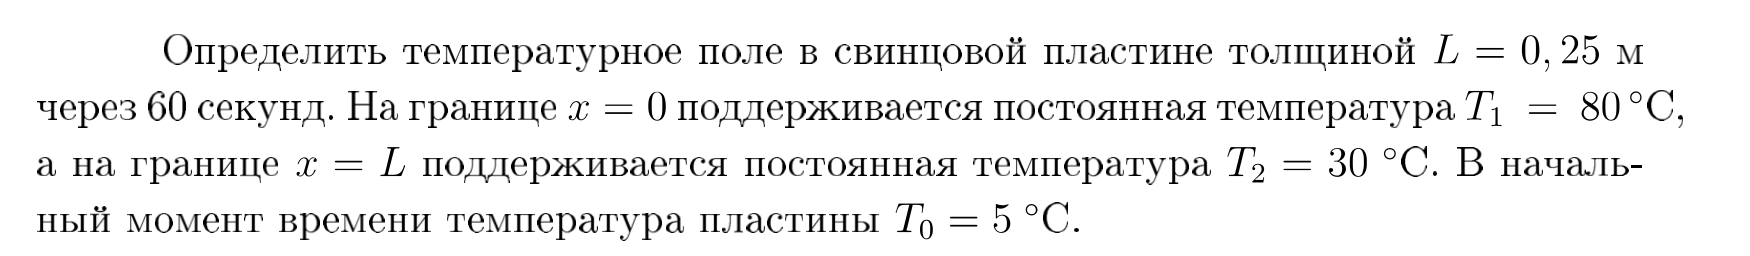

In [ ]:
def solve(mu, mu1, mu2, a, T, L, N, M):
    h = 2*L / N
    tau = T / M

    t = np.arange(0, T + tau, tau)
    x = np.arange(0, L + h, h)
    u = np.zeros((len(t), len(x)))

    for i in range(len(x)):
        u[0, i] = mu(x[i])

    for n in range(len(t)-1):
        u[n+1, 0] = mu1(t[n+1])
        u[n+1, -1] = mu2(t[n+1])
        for i in range(1, len(x) - 1):
            u[n+1, i] = u[n, i] + tau * a * (u[n, i+1] - 2*u[n, i] + u[n, i-1]) / (h ** 2)

    return t, x, u

In [ ]:
L = 0.25
a = 2

u0 = lambda x: 5
u1, u2 = lambda t: 80, lambda t: 30

T = 1
N = 100
M = getM(a, L, T, N)

tau = T / M
h = 2*L / N
alpha = a * tau / h**2
print(f"Необх. спектр. признак уст. {'не' * int(alpha > 0.5)} выполняется: a*tau/h^2={alpha}")

Необх. спектр. признак уст.  выполняется: a*tau/h^2=0.5


In [ ]:
t, x, u = solve(u0, u1, u2, a, T, L, N, M)

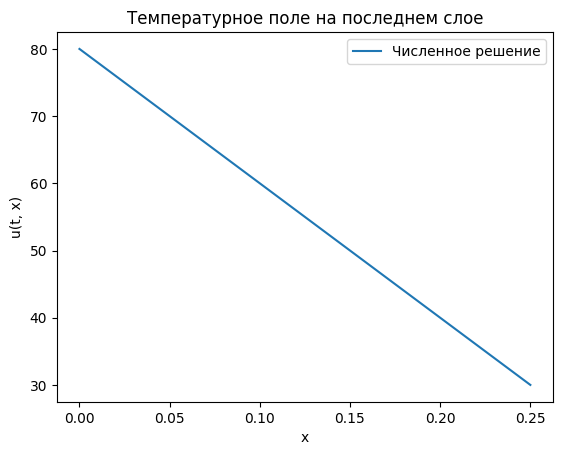

In [ ]:
plt.plot(x, u[-1, :], label="Численное решение")

plt.title("Температурное поле на последнем слое")
plt.xlabel("x")
plt.ylabel("u(t, x)")
plt.legend()

plt.show()

In [ ]:
n = len(u[-1, :]) // 2

for temp in u[-1, :n]:
    print(round(temp, 2), end=" ")

print()

for temp in u[-1, n:]:
    print(round(temp, 2), end=" ")

80.0 79.0 78.0 77.0 76.0 75.0 74.0 73.0 72.0 71.0 70.0 69.0 68.0 67.0 66.0 65.0 64.0 63.0 62.0 61.0 60.0 59.0 58.0 57.0 56.0 
55.0 54.0 53.0 52.0 51.0 50.0 49.0 48.0 47.0 46.0 45.0 44.0 43.0 42.0 41.0 40.0 39.0 38.0 37.0 36.0 35.0 34.0 33.0 32.0 31.0 30.0 